In [11]:
### Q-learning algorithm makes a slight change to the SARSA algorithm.

### Instead of selecting using the action for the next state (a') as per the policy, Q learning
### uses the Q value for the action on the state, that has the maximum value.

### So, for Q learning, we only sample (s,a,r,s') and not a'.

### The updation is done as:

### Q[s,a]+=alpha*((r+gamma * max(Q[s_]))-Q[s,a])

### Q[s_] will look like [60, 50, 30] if there are 3 actions, Q value for each actions on the state.
### So, it goes for the best case overlooking the Q-value for real action to be taken according to the policy.

### This is called an optimistic action strategy, as it chooses the action that yeilds best results instead of the 
### one from policy.

### SARSA -> Realistic
### Q-learning -> Optimistic

### Both SARSA and Q Learning converges to the same thing

### Initially, the SARSA provides a better estimate than the Q-Learning, as Q-learning always picks the best action-state
### value for the state, optimistically. Later, they both converge.

### The optimistic nature of the Q-learning, produces a maximization bias for the Q-learning algorithm.

### NO episodic setting required

### Boot strapping is done to estimate return for the state using the optimistic policy, selecting the maximum return 
### from any action in the next state as:

### G = R + gamma * max(Q[s']) 

### Markovian domain required.



### Accessing Problem 

In [2]:
!pip3 install pygame

     |████████████████████████████████| 11.8MB 24.9MB/s 


In [3]:
import os
os.environ['SDL_VIDEODRIVER']='dummy'
import pygame
pygame.display.set_mode((640,480))

pygame 2.0.1 (SDL 2.0.14, Python 3.7.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


<Surface(640x480x32 SW)>

In [ ]:
!unzip images.zip

In [ ]:
!unzip modules.zip

In [6]:
from gridworld import GridWorld
import numpy as np

In [7]:
world=\
    """
    wwwwwwwwww
    wa       w
    w    wwwww
    wwww     w
    w        w
    w        w
    w        w
    w g  wwwww
    w        w
    wwwwwwwwww
    """

#### World Declaration
env=GridWorld(world)

env._max_epi_step=200     ## Number of maximum steps in an episode

In [8]:
import matplotlib.pyplot as plt
import cv2

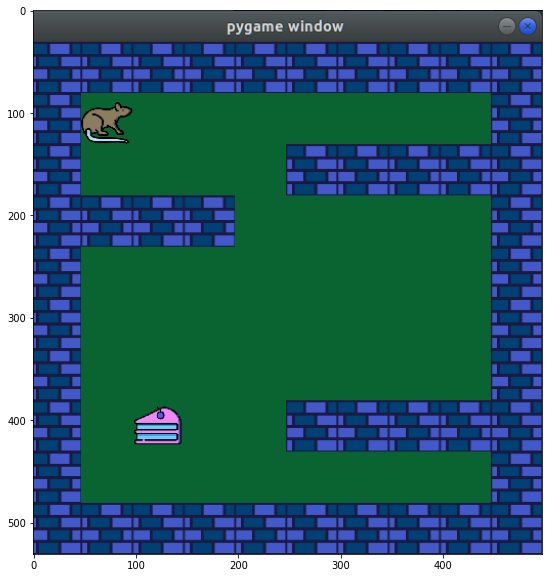

In [9]:
img=cv2.imread("problem_window.png")
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.show()

### Q Learning

In [10]:
import numpy as np
import tqdm

In [12]:
def generate_sample(policy):

  episodes=[]
  curr_state=env.reset()  ### Returns a starting state.
  

  while True:
    action=policy[curr_state]
    next_state,reward,done,_=env.step(action)  ### Returns from environment on taking an action
    yield(curr_state,action,reward,next_state)  ### Throws this tuple, works like a generator

    if done== True:
      curr_state=env.reset()  ### Returns a starting state
    else:
      curr_state=next_state ### updating state

    
### As in case of Q-leaning episodic setting is not required, so we just need to throw the tuples to
## Update the value functions accordingly. The action is taken according to the policy.


In [13]:
def get_e(episode,steady_epsilon=0.01,steady_episode=1000):
  ### Obtaining the epsilon for the episode.
  ### The steady epsilon, we settle on is 0.01 after episode 1000
  ### Till 1000, epsilon decays linearly.

  if episode>steady_episode:  ##If we are above the steady episode, we return a steady epsilon
    return steady_epsilon
  else:
    slope=(steady_epsilon - 1)/(steady_episode - 0) 
    ### Line (1,0) to (steady_epsilon,steady_episode)

    ### slope*episode will give us the decrease in the value of epsilon
    ### To get the value we add 1 to the value so it is (1 - decrease), as epsilon starts from 1.
    return slope*episode + 1

In [14]:
def obtain_action_greed(Q_function, state, epsilon, actions):
  ### Obtaining policy based on the current Q function values, and epsilon value.
  ### This method is called E-greedy policy.

  ### "state" represents the state for which the policy is being updated

  optimal_action=np.argmax(Q_function[state])  ### finding the action for the state that
  ## provides the maximum Q-value

  if np.random.random()<=1-epsilon:  ### Random.random() generates number in (0,1) 
  ###probability 1/(b-a). where b and a are upper and lower limits
    chosen_action=optimal_action
    #### Choosing the best action according to policy. with probability (1-epsilon)
  else:
    chosen_action=np.random.choice(actions)
    ### else choosing random action with probability epsilon/|actions| for each.
  
  return chosen_action ### The action for the given state

In [15]:
def get_policy(gamma=0.99,alpha=0.01):
  Q=np.zeros((env.state_count,len(env.action_space)))

  ### initializing the Q function to record the details of the actions on a particular state.
  epsilon=1 ## Initially exploration control value 1: maximum
  policy=np.random.choice(env.action_space,size=env.state_count)
  ### Initialized a complete random policy, an action for each state.
  
  generator=generate_sample(policy) ### initializing a generator.
  for tuple_number in tqdm.tqdm(range(100000)):  
    ### We train on a batch of 100000 collected episodes.
    s,a,r,s_= next(generator)### Generating the next sample

    Q[s,a]=Q[s,a]+alpha*((r + gamma*np.max(Q[s_]))-Q[s,a]) ### Bootstrapping type update of Q function 
    ### using the max state-action value for the next state s'.
    
    epsilon=get_e(tuple_number) ### Getting the epsilon for the update.
    policy[s]=obtain_action_greed(Q,s,epsilon,env.action_space)
    ### Updating the policy for the state under consideration.
  return policy

In [16]:
policy=get_policy()

100%|██████████| 100000/100000 [00:09<00:00, 10647.49it/s]


In [17]:
policy

array([0, 0, 1, 1, 2, 0, 3, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1,
       2, 2, 3, 1, 1, 2, 2, 2, 2, 0, 3, 0, 1, 2, 2, 2, 2, 1, 1, 0, 3, 2,
       2, 3, 1, 3, 0, 0, 3, 2, 1])

In [18]:
env.setPolicy(policy)

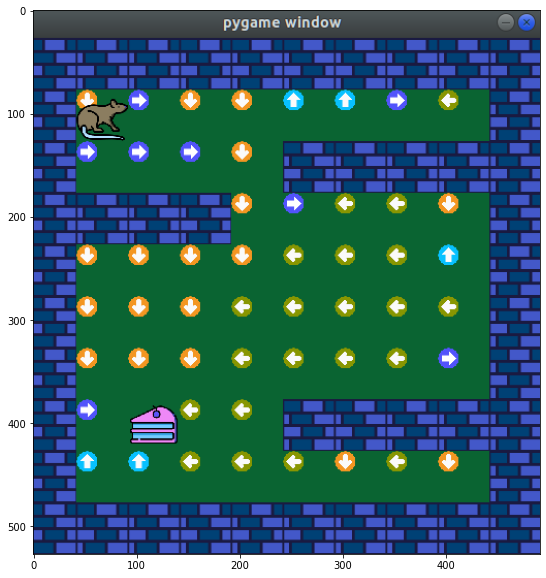

In [20]:
img=cv2.imread("Route_q.png")
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.show()